# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore")

# Importing Customer & Properties CSV

In [2]:
customer_data = pd.read_csv(r"file path.csv", parse_dates = ["birth_date"])
properties_data = pd.read_csv(r"file path.csv")

In [3]:
customer_data.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5,No,Website


In [4]:
properties_data.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


# Data Cleaning and Pre-Processing

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         162 non-null    int64         
 1   ﻿customerid        162 non-null    object        
 2   entity             162 non-null    object        
 3   name               162 non-null    object        
 4   surname            162 non-null    object        
 5   birth_date         155 non-null    datetime64[ns]
 6   sex                155 non-null    object        
 7   country            162 non-null    object        
 8   state              154 non-null    object        
 9   purpose            162 non-null    object        
 10  deal_satisfaction  162 non-null    int64         
 11  mortgage           162 non-null    object        
 12  source             162 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 16.6+ KB

In [6]:
customer_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
customer_data[customer_data["birth_date"].isna()]
# From this we can say that company properties have null values of sex and birth date.

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
4,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5,No,Website
11,C0055,Company,Kylax,Co,NaT,NaN,USA,California,Investment,5,No,Website
13,C0121,Company,Esther,Co,NaT,NaN,USA,California,Home,3,Yes,Website
53,C0012,Company,Bridger CAL,Co,NaT,NaN,USA,Nevada,Investment,5,No,Website
57,C0029,Company,Kenyon,Co,NaT,NaN,USA,California,Investment,1,Yes,Website
127,C0025,Company,Abdiel,Co,NaT,NaN,USA,Nevada,Investment,5,Yes,Website
154,C0001,Company,Kamd,Co,NaT,NaN,USA,California,Investment,5,No,Agency


In [8]:
''' 
    We are not sure what to do with null values of state but if the properties data has a value of area containing 
    the customer ids then we can use that cvalue so i am going to hold it for now to change with mode.
'''
customer_data[customer_data["state"].isna()]

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
6,C0079,Individual,Xavier,Faulkner,1947-05-24,M,Canada,NaN,Investment,5,No,Website
33,C0015,Individual,Lauryn,Patrick,1969-10-30,F,Belgium,NaN,Home,2,No,Agency
34,C0084,Individual,Diego,Mendez,1965-05-12,M,Mexico,NaN,Home,3,No,Agency
38,C0070,Individual,Aleksandra,Karenina,1967-06-13,F,Russia,NaN,Home,1,No,Agency
72,C0047,Individual,Alejandra,Greer,1965-01-11,F,Denmark,NaN,Investment,1,No,Agency
97,C0059,Individual,Elena,Petrova,1949-06-22,F,Russia,NaN,Home,3,Yes,Agency
133,C0021,Individual,Kaylin,Villarreal,1932-06-13,F,Russia,NaN,Investment,3,No,Website
148,C0063,Individual,Piotr,Aleksandrov,1955-12-02,M,Russia,NaN,Investment,3,No,Agency


#### Now, I want to see all the unique values of the columns and see if any one of them have any abnormality

In [9]:
for column in customer_data.columns:
    print(f"{column}")
    print(customer_data[column].unique())
    print("\n")
# There's no abnormality

﻿customerid
['C0110' 'C0010' 'C0132' 'C0137' 'C0174' 'C0088' 'C0079' 'C0149' 'C0064'
 'C0068' 'C0006' 'C0055' 'C0016' 'C0121' 'C0074' 'C0032' 'C0093' 'C0076'
 'C0165' 'C0153' 'C0129' 'C0162' 'C0071' 'C0069' 'C0005' 'C0144' 'C0020'
 'C0101' 'C0128' 'C0033' 'C0171' 'C0095' 'C0123' 'C0015' 'C0084' 'C0019'
 'C0053' 'C0080' 'C0070' 'C0051' 'C0022' 'C0127' 'C0081' 'C0104' 'C0073'
 'C0168' 'C0169' 'C0039' 'C0086' 'C0036' 'C0045' 'C0105' 'C0119' 'C0012'
 'C0065' 'C0054' 'C0172' 'C0029' 'C0098' 'C0142' 'C0135' 'C0037' 'C0134'
 'C0091' 'C0018' 'C0085' 'C0061' 'C0066' 'C0156' 'C0043' 'C0112' 'C0145'
 'C0047' 'C0082' 'C0007' 'C0052' 'C0041' 'C0004' 'C0118' 'C0030' 'C0154'
 'C0125' 'C0115' 'C0078' 'C0151' 'C0111' 'C0014' 'C0103' 'C0024' 'C0166'
 'C0067' 'C0122' 'C0107' 'C0003' 'C0099' 'C0160' 'C0013' 'C0059' 'C0120'
 'C0150' 'C0140' 'C0002' 'C0096' 'C0159' 'C0163' 'C0100' 'C0155' 'C0049'
 'C0148' 'C0146' 'C0034' 'C0141' 'C0008' 'C0131' 'C0089' 'C0157' 'C0114'
 'C0124' 'C0158' 'C0175' 'C0023' 'C0164

In [10]:
customer_data["country"] = customer_data["country"].str.strip()
customer_data["country"].unique()

array(['USA', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia', 'UK',
       'Denmark'], dtype=object)

In [11]:
properties_data.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [12]:
properties_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [13]:
properties_data.head(2)

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027


In [14]:
properties_data.columns = ['﻿property_id', 'building', 'sale_date', 'type', 'property', 'area', 'price', 'status', 'customerid']

In [15]:
print(properties_data.head(), "\n")
print("Shape", properties_data.shape)

   ﻿property_id  building  sale_date       type  property     area  \
0          1030         1  11/1/2005  Apartment        30   743.09   
1          1029         1  10/1/2005  Apartment        29   756.21   
2          2002         2   7/1/2007  Apartment         2   587.28   
3          2031         2  12/1/2007  Apartment        31  1604.75   
4          1049         1  11/1/2004  Apartment        49  1375.45   

          price  status customerid  
0  $246,172.68    Sold      C0028   
1  $246,331.90    Sold      C0027   
2  $209,280.91    Sold      C0112   
3  $452,667.01    Sold      C0160   
4  $467,083.31    Sold      C0014    

Shape (267, 9)


In [16]:
properties_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ﻿property_id  267 non-null    int64  
 1   building      267 non-null    int64  
 2   sale_date     267 non-null    object 
 3   type          267 non-null    object 
 4   property      267 non-null    int64  
 5   area          267 non-null    float64
 6   price         267 non-null    object 
 7   status        267 non-null    object 
 8   customerid    195 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 18.9+ KB


In [17]:
properties_data[properties_data["customerid"].isna()]

,﻿property_id,building,sale_date,type,property,area,price,status,customerid
178,5052,5,#NUM!,Apartment,52,1769.48,"$532,877.38",-,NaN
196,1002,1,#NUM!,Apartment,2,1238.58,"$400,865.92",-,NaN
197,1003,1,#NUM!,Office,3,713.71,"$217,787.71",-,NaN
198,1008,1,#NUM!,Apartment,8,763.21,"$219,630.90",-,NaN
199,1019,1,#NUM!,Apartment,19,798.50,"$244,624.87",-,NaN
...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [18]:
for column in properties_data.columns:
    print(f"{column}")
    print(properties_data[column].unique(), "\n")

﻿property_id
[1030 1029 2002 2031 1049 3011 3026 3023 1031 4023 1036 1046 4035 2036
 2056 1047 5051 2007 3020 3029 3015 2004 2006 5013 1026 2054 3033 1025
 3027 3031 2043 3034 3016 1018 2050 2044 3039 3053 2041 5035 4005 1032
 3046 1041 1012 5033 4006 5040 4013 1003 2009 4024 4012 1035 2017 4051
 3014 2051 2025 3047 2046 5016 4041 4018 2005 2010 2022 2047 2012 3038
 4030 3017 1045 2040 2042 2048 3049 1017 1039 2049 3054 3055 3042 1038
 2020 2014 3001 3043 2016 4049 4022 3059 4034 5027 5028 2026 3022 2024
 3003 2011 2028 3028 3036 4010 4011 3035 3037 2032 2018 2035 5025 2029
 3007 3030 2003 5039 5030 3041 2057 4028 3032 3013 1040 4031 4019 4029
 1021 1006 2034 3021 5021 5022 1044 1043 1027 2023 5046 1002 2030 3050
 5050 2039 2008 3019 2015 2033 2019 2021 2027 2052 3006 3044 4025 1015
 5041 5036 2037 5034 4016 4040 1024 2013 3010 3018 1033 1016 3005 5019
 3002 3004 3012 3048 3008 3040 1023 3009 3052 3025 5052 1005 1009 1011
 1007 1008 2038 2001 1013 1014 1019 1020 1022 1028 1034 1037 104

##### sale_date, price, status, customerid columns need cleaning

In [19]:
properties_data["sale_date"] = pd.to_datetime(properties_data["sale_date"].replace("#NUM!", np.nan, regex = True), format ="%m/%d/%Y")

In [20]:
properties_data[properties_data["sale_date"].isna()]

,﻿property_id,building,sale_date,type,property,area,price,status,customerid
178,5052,5,NaT,Apartment,52,1769.48,"$532,877.38",-,NaN
196,1002,1,NaT,Apartment,2,1238.58,"$400,865.92",-,NaN
197,1003,1,NaT,Office,3,713.71,"$217,787.71",-,NaN
198,1008,1,NaT,Apartment,8,763.21,"$219,630.90",-,NaN
199,1019,1,NaT,Apartment,19,798.50,"$244,624.87",-,NaN
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,NaT,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,NaT,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,NaT,Apartment,50,1074.71,"$365,868.78",-,NaN


In [21]:
properties_data[(properties_data["sale_date"].isna()) & (properties_data["status"] == "-")]

,﻿property_id,building,sale_date,type,property,area,price,status,customerid
178,5052,5,NaT,Apartment,52,1769.48,"$532,877.38",-,NaN
196,1002,1,NaT,Apartment,2,1238.58,"$400,865.92",-,NaN
197,1003,1,NaT,Office,3,713.71,"$217,787.71",-,NaN
198,1008,1,NaT,Apartment,8,763.21,"$219,630.90",-,NaN
199,1019,1,NaT,Apartment,19,798.50,"$244,624.87",-,NaN
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,Apartment,44,1238.58,"$322,610.74",-,NaN
263,5047,5,NaT,Apartment,47,794.52,"$279,191.26",-,NaN
264,5048,5,NaT,Apartment,48,1013.27,"$287,996.53",-,NaN
265,5050,5,NaT,Apartment,50,1074.71,"$365,868.78",-,NaN


In [22]:
properties_data["status"].value_counts()

status
 Sold     195
-          72
Name: count, dtype: int64

The sale date is null when the status of property is "-". so, we can say they are not sold date and for state "-" means "Not Sold"

In [23]:
properties_data["status"] = properties_data["status"].str.strip().replace("-", "Not_Sold", regex = True)

In [24]:
properties_data["price"] = properties_data["price"].str.split("$").str.get(1).str.strip()

In [25]:
properties_data["price"] = properties_data["price"].replace(",","", regex = True).astype(float)

In [26]:
properties_data["customerid"] = properties_data["customerid"].str.strip()

In [27]:
properties_data.head()

,﻿property_id,building,sale_date,type,property,area,price,status,customerid
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014


# Now, Join both Table properties_data & customer_data with customer_id as the column connecting them.

In [28]:
# df = pd.merge(customer_data, properties_data, how = "right", on = "customerid")
# This will give error because the customerid in customer_data has invisible character. which can be understand as below.

In [29]:
print(customer_data.columns)
print(properties_data.columns)

Index(['﻿customerid', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')
Index(['﻿property_id', 'building', 'sale_date', 'type', 'property', 'area',
       'price', 'status', 'customerid'],
      dtype='object')


In [30]:
customer_data.columns[0] == properties_data.columns[8]

False

In [31]:
print("customer_data_column", len('﻿customerid'))
print("properties_data_column", len('customerid'))

customer_data_column 11
properties_data_column 10


In [32]:
customer_data.columns.array

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [33]:
customer_data.rename(columns = {"\ufeffcustomerid" : "customerid"}, inplace = True)

In [34]:
real_estate = pd.merge(customer_data, properties_data, how = "right", on = "customerid")

In [35]:
df = real_estate.copy()

In [36]:
df["name"] = df["name"] + " " + df["surname"]

In [37]:
df.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿property_id,building,sale_date,type,property,area,price,status
0,C0028,Individual,Madalyn Mercer,Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold
1,C0027,Individual,Lara Carrillo,Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold
2,C0112,Individual,Donavan Flowers,Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold
3,C0160,Individual,Darien Dorsey,Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold
4,C0014,Individual,Alessandra Perry,Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold


In [38]:
df = df.drop("surname", axis = 1)
df.shape

(267, 19)

In [39]:
df.describe()

,birth_date,deal_satisfaction,﻿property_id,building,sale_date,property,area,price
count,178,195.000000,267.000000,267.000000,195,267.000000,267.000000,267.000000
mean,1961-01-08 11:35:43.820224704,3.600000,2975.142322,2.947566,2006-11-08 14:38:46.153846272,27.580524,936.221311,281171.901386
min,1931-02-13 00:00:00,1.000000,1002.000000,1.000000,2004-03-01 00:00:00,1.000000,410.710000,117564.070000
25%,1951-05-04 06:00:00,3.000000,2015.500000,2.000000,2006-04-16 00:00:00,14.500000,756.210000,217553.055000
50%,1962-09-23 00:00:00,4.000000,3024.000000,3.000000,2007-03-01 00:00:00,28.000000,798.280000,249075.660000
75%,1970-07-09 06:00:00,5.000000,4031.500000,4.000000,2007-09-01 00:00:00,40.000000,1121.950000,326964.855000
max,1986-06-21 00:00:00,5.000000,5052.000000,5.000000,2010-05-01 00:00:00,59.000000,1942.500000,538271.740000
std,NaN,1.340872,1392.197474,1.391794,NaN,15.361437,284.894858,89119.121005


## Breakdown by Building

In [40]:
df["building"].value_counts().sort_values(ascending = False)

building
3    63
2    57
1    52
5    52
4    43
Name: count, dtype: int64

In [41]:
df.groupby(["building","status"]).agg( Number_of_items = ("price", "count"))

Number_of_items
building status                   
1        Not_Sold                6
         Sold                   46
2        Not_Sold                3
         Sold                   54
3        Not_Sold               10
         Sold                   53
4        Not_Sold               20
         Sold                   23
5        Not_Sold               33
         Sold                   19

In [42]:
df.groupby(["building","mortgage"]).agg( Number_of_items = ("price", "count"))

Number_of_items
building mortgage                 
1        No                     32
         Yes                    14
2        No                     36
         Yes                    18
3        No                     38
         Yes                    15
4        No                     14
         Yes                     9
5        No                     13
         Yes                     6

In [43]:
df.groupby("building").agg(Avg_deal_satisfaction = ("deal_satisfaction", "mean"),
                                Avg_price = ("price", "mean"),
                                Avg_area = ("area", "mean"))

,Avg_deal_satisfaction,Avg_price,Avg_area
building,,,
1,3.630435,275143.242500,928.038846
2,3.518519,286661.848246,943.891930
3,3.566038,280451.255556,927.852381
4,3.869565,290239.515581,974.720930
5,3.526316,274557.604615,914.298654


In [44]:
total_price_df = df.groupby(["building", "status"]).agg(Total_Revenue  = ("price", "sum"))

In [45]:
total_price_df = total_price_df.reset_index()[total_price_df.reset_index()["status"] == "Sold"]
total_price_df

,building,status,Total_Revenue
1,1,Sold,12660073.51
3,2,Sold,15064176.13
5,3,Sold,13739779.13
7,4,Sold,6318607.24
9,5,Sold,4757103.37


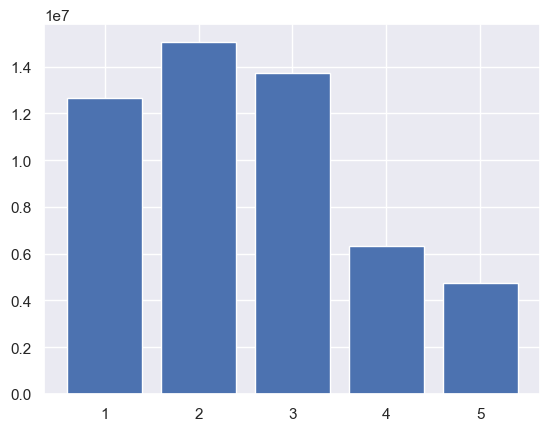

In [46]:
plt.bar(total_price_df['building'], total_price_df["Total_Revenue"])
plt.show()

## Breakdown by USA State

In [47]:
df.groupby(["country", "state"]).agg( Total_revenue = ("price", "sum"))

Total_revenue
country state                    
Belgium Arizona         242740.66
Germany California      205098.21
UK      Arizona         226342.80
        California      213942.56
USA     Arizona        2385712.95
        California    33022648.19
        Colorado       2570287.08
        Kansas          252185.99
        Nevada         4720038.60
        Oregon         2602526.55
        Utah           1188776.40
        Virginia        860576.75
        Wyoming         204286.67

In [48]:
df[(df['country'].notnull()) & (df['state'].isnull())]

,customerid,entity,name,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿property_id,building,sale_date,type,property,area,price,status
41,C0015,Individual,Lauryn Patrick,1969-10-30,F,Belgium,NaN,Home,2.0,No,Agency,1032,1,2005-01-01,Apartment,32,782.25,215410.28,Sold
58,C0070,Individual,Aleksandra Karenina,1967-06-13,F,Russia,NaN,Home,1.0,No,Agency,2025,2,2007-02-01,Apartment,25,927.83,315733.15,Sold
64,C0047,Individual,Alejandra Greer,1965-01-11,F,Denmark,NaN,Investment,1.0,No,Agency,2005,2,2006-09-01,Apartment,5,785.48,257183.48,Sold
76,C0084,Individual,Diego Mendez,1965-05-12,M,Mexico,NaN,Home,3.0,No,Agency,3049,3,2007-04-01,Apartment,49,1283.45,338181.18,Sold
114,C0063,Individual,Piotr Aleksandrov,1955-12-02,M,Russia,NaN,Investment,3.0,No,Agency,2003,2,2006-12-01,Apartment,3,927.08,289727.99,Sold
139,C0059,Individual,Elena Petrova,1949-06-22,F,Russia,NaN,Home,3.0,Yes,Agency,3050,3,2006-11-01,Apartment,50,977.87,248274.31,Sold
146,C0079,Individual,Xavier Faulkner,1947-05-24,M,Canada,NaN,Investment,5.0,No,Website,2019,2,2007-03-01,Apartment,19,649.80,177555.06,Sold
147,C0079,Individual,Xavier Faulkner,1947-05-24,M,Canada,NaN,Investment,5.0,No,Website,2021,2,2007-04-01,Apartment,21,785.48,217748.48,Sold
148,C0079,Individual,Xavier Faulkner,1947-05-24,M,Canada,NaN,Investment,5.0,No,Website,2027,2,2007-04-01,Apartment,27,785.48,247739.44,Sold
149,C0079,Individual,Xavier Faulkner,1947-05-24,M,Canada,NaN,Investment,5.0,No,Website,2052,2,2007-03-01,Apartment,52,1615.29,484458.03,Sold


In [49]:
df[df["country"] == np.nan]
# 128, 102, 125, 175, 

,customerid,entity,name,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿property_id,building,sale_date,type,property,area,price,status


In [50]:
df["country"].unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada', nan], dtype=object)

In [51]:
df.loc[[128,102,125,175], "state"] = np.nan

In [52]:
df.loc[[128,102,125,175], :]

,customerid,entity,name,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿property_id,building,sale_date,type,property,area,price,status
128,C0108,Individual,Van Charles,1952-05-15,M,USA,NaN,Home,2.0,Yes,Client,2034,2,2007-07-01,Apartment,34,785.48,252927.84,Sold
102,C0132,Individual,Kale Gay,1959-04-07,M,USA,NaN,Home,4.0,Yes,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold
125,C0175,Individual,Madeline Michael,1953-07-30,F,USA,NaN,Home,4.0,Yes,Website,4029,4,2007-11-01,Apartment,29,794.52,200148.89,Sold
175,C0148,Individual,Myah Roman,1933-05-05,F,USA,NaN,Investment,5.0,Yes,Agency,3009,3,2006-05-01,Apartment,9,743.41,222867.42,Sold


In [53]:
State_revenue = df.groupby(["country", "state"]).agg( Total_revenue = ("price", "sum")).sort_values("Total_revenue", ascending = False)

In [54]:
State_revenue = State_revenue.reset_index()
State_revenue["Cummulative_Revenue"] = State_revenue["Total_revenue"].cumsum()
State_revenue["Cummulative_Prcentage_Revenue"] = (((State_revenue["Cummulative_Revenue"]) * 100.00) / (State_revenue["Total_revenue"].sum()))
State_revenue

,country,state,Total_revenue,Cummulative_Revenue,Cummulative_Prcentage_Revenue
0,USA,California,32241106.29,32241106.29,67.647161
1,USA,Nevada,4720038.60,36961144.89,77.550581
2,USA,Oregon,2602526.55,39563671.44,83.011111
3,USA,Arizona,2385712.95,41949384.39,88.016731
4,USA,Colorado,2317359.24,44266743.63,92.878933
5,USA,Utah,1188776.40,45455520.03,95.373182
6,USA,Virginia,860576.75,46316096.78,97.178814
7,USA,Kansas,252185.99,46568282.77,97.707942
8,Belgium,Arizona,242740.66,46811023.43,98.217252
9,UK,Arizona,226342.80,47037366.23,98.692156


In [55]:
df.groupby("state").agg(properties_sold = ("price", "count"))

,properties_sold
state,
Arizona,11
California,117
Colorado,10
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


## Breakdown by Country

In [56]:
Breakdown_by_Country = df.groupby("country").agg(Total_revenue = ("price" , "sum")).sort_values("Total_revenue", ascending = False)
Breakdown_by_Country = Breakdown_by_Country.reset_index()
Breakdown_by_Country["Cummulative_revenue"] = Breakdown_by_Country["Total_revenue"].cumsum()
Breakdown_by_Country["Cummulative_revenue_percentage"] = (Breakdown_by_Country["Cummulative_revenue"] * 100.00 / Breakdown_by_Country["Total_revenue"].sum())
Breakdown_by_Country

,country,Total_revenue,Cummulative_revenue,Cummulative_revenue_percentage
0,USA,47807039.18,47807039.18,90.992151
1,Canada,1918485.69,49725524.87,94.643646
2,Russia,1115315.34,50840840.21,96.766449
3,Belgium,458150.94,51298991.15,97.638458
4,UK,440285.36,51739276.51,98.476462
5,Mexico,338181.18,52077457.69,99.120129
6,Denmark,257183.48,52334641.17,99.609632
7,Germany,205098.21,52539739.38,100.000000


In [57]:
df.groupby("country").agg(Ave_price = ("price", "mean"))

,Ave_price
country,
Belgium,229075.470000
Canada,274069.384286
Denmark,257183.480000
Germany,205098.210000
Mexico,338181.180000
Russia,278828.835000
UK,220142.680000
USA,270096.266554


In [58]:
df.groupby("country").agg(ave_deal_satisfaction = ("deal_satisfaction", "mean"))

,ave_deal_satisfaction
country,
Belgium,3.000000
Canada,5.000000
Denmark,1.000000
Germany,5.000000
Mexico,3.000000
Russia,2.500000
UK,4.000000
USA,3.581921


## Customer age and properties

In [59]:
df

,customerid,entity,name,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿property_id,building,sale_date,type,property,area,price,status
0,C0028,Individual,Madalyn Mercer,1986-06-21,F,USA,California,Home,5.0,No,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold
1,C0027,Individual,Lara Carrillo,1983-02-24,F,USA,California,Home,5.0,No,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold
2,C0112,Individual,Donavan Flowers,1985-12-27,M,USA,California,Home,1.0,Yes,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold
3,C0160,Individual,Darien Dorsey,1985-12-27,M,USA,California,Investment,3.0,Yes,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold
4,C0014,Individual,Alessandra Perry,1979-05-15,F,USA,California,Home,4.0,No,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,NaT,Apartment,44,1238.58,322610.74,Not_Sold
263,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,NaT,Apartment,47,794.52,279191.26,Not_Sold
264,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,NaT,Apartment,48,1013.27,287996.53,Not_Sold
265,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,NaT,Apartment,50,1074.71,365868.78,Not_Sold


In [60]:
df["customer_age_at_sale"] = round(((df["sale_date"] - df["birth_date"]).dt.days/ 365))

In [61]:
df["customer_age_at_sale"]

0      19.0
1      23.0
2      22.0
3      22.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: customer_age_at_sale, Length: 267, dtype: float64

In [62]:
bins = [0, 19, 24, 30, 35, 42, 48, 54, 59, 65, 71, 76]
labels = ["19.0 - 24.0", "25.0 - 30.0", "31.0 - 35.0", "36.0 - 41.0", "42.0 - 47.0", "48.0 - 53.0", "54.0 - 58.0", "59.0 - 64.0", "65.0 - 70.0", "71.0 - 76.0", "77.0+"]

df["Customer_age_group"] = pd.cut(df["customer_age_at_sale"], bins=bins, labels=labels)


In [63]:
len(bins)

12

In [64]:
df.groupby("Customer_age_group").agg(properties_sold = ("price" , "count"), Total_sales = ("price", "sum"))

,properties_sold,Total_sales
Customer_age_group,,
19.0 - 24.0,1,246172.68
25.0 - 30.0,3,908279.82
31.0 - 35.0,16,5005113.91
36.0 - 41.0,23,5973242.42
42.0 - 47.0,36,10379217.82
48.0 - 53.0,30,8056664.82
54.0 - 58.0,19,4736907.90
59.0 - 64.0,18,4743349.82
65.0 - 70.0,12,3170647.00


## Price Interval

In [65]:
print("min price =",df["price"].min())
print("max price =",df["price"].max())

min price = 117564.07
max price = 538271.74


In [66]:
(df["price"].max() - df["price"].min())/ 8

52588.45875

In [67]:
bins_1 = [0, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000]
labels_1 = ["0 - 100k", "100k - 150k", "150k - 200k", "200k - 250k", "250k - 300k", "300k - 350k", "350k - 400k", "400k - 450k", "450k - 500k", "500k+"]

df["price_interval"] = pd.cut(df["price"], bins = bins_1, labels = labels_1, right = True)


In [68]:
df.groupby(["status", "price_interval"]).agg(Properties_sold = ("price" , "count"))

Properties_sold
status   price_interval                 
Not_Sold 0 - 100k                      0
         100k - 150k                   1
         150k - 200k                   4
         200k - 250k                  21
         250k - 300k                  14
         300k - 350k                   9
         350k - 400k                   7
         400k - 450k                   6
         450k - 500k                   5
         500k+                         5
Sold     0 - 100k                      0
         100k - 150k                   1
         150k - 200k                  24
         200k - 250k                  84
         250k - 300k                  34
         300k - 350k                  19
         350k - 400k                  16
         400k - 450k                   6
         450k - 500k                   9
         500k+                         2

In [69]:
pd.set_option("display.max_rows", None)
df.groupby(["Customer_age_group", "price_interval"]).agg(Properties_sold = ("price" , "count"))

Properties_sold
Customer_age_group price_interval                 
19.0 - 24.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   0
                   200k - 250k                   1
                   250k - 300k                   0
                   300k - 350k                   0
                   350k - 400k                   0
                   400k - 450k                   0
                   450k - 500k                   0
                   500k+                         0
25.0 - 30.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   0
                   200k - 250k                   2
                   250k - 300k                   0
                   300k - 350k                   0
                   350k - 400k                   0
                   400k - 450k                   0
                   450k - 500k                   1
                   500k+                         0
31.0 - 35.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   2
                   200k - 250k                   5
                   250k - 300k                   2
                   300k - 350k                   2
                   350k - 400k                   0
                   400k - 450k                   1
                   450k - 500k                   3
                   500k+                         1
36.0 - 41.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   6
                   200k - 250k                   6
                   250k - 300k                   4
                   300k - 350k                   3
                   350k - 400k                   3
                   400k - 450k                   1
                   450k - 500k                   0
                   500k+                         0
42.0 - 47.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   4
                   200k - 250k                  12
                   250k - 300k                   5
                   300k - 350k                   9
                   350k - 400k                   2
                   400k - 450k                   1
                   450k - 500k                   3
                   500k+                         0
48.0 - 53.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   2
                   200k - 250k                  15
                   250k - 300k                   5
                   300k - 350k                   2
                   350k - 400k                   4
                   400k - 450k                   1
                   450k - 500k                   1
                   500k+                         0
54.0 - 58.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   4
                   200k - 250k                   9
                   250k - 300k                   2
                   300k - 350k                   1
                   350k - 400k                   3
                   400k - 450k                   0
                   450k - 500k                   0
                   500k+                         0
59.0 - 64.0        0 - 100k                      0
                   100k - 150k                   0
                   150k - 200k                   1
                   200k - 250k                  10
                   250k - 300k                   4
                   300k - 350k                   0
                   350k - 400k                   2
      

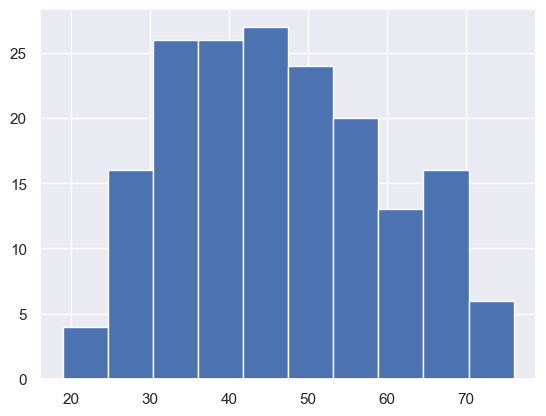

In [70]:
plt.hist(df["customer_age_at_sale"], bins = 10)
plt.show()

## Revenue by years

In [71]:
df.columns

Index(['customerid', 'entity', 'name', 'birth_date', 'sex', 'country', 'state',
       'purpose', 'deal_satisfaction', 'mortgage', 'source', '﻿property_id',
       'building', 'sale_date', 'type', 'property', 'area', 'price', 'status',
       'customer_age_at_sale', 'Customer_age_group', 'price_interval'],
      dtype='object')

In [72]:
sale_by_date = df[df["sale_date"].notnull()][["sale_date", "price"]]

In [73]:
Revenue_as_per_Year = sale_by_date.groupby(df["sale_date"].dt.year).agg(Total_Revenue = ("price", "sum"))
Revenue_as_per_Year= Revenue_as_per_Year.reset_index()
Revenue_as_per_Year["Total_Revenue"] = Revenue_as_per_Year["Total_Revenue"]/ 1000000.00
Revenue_as_per_Year.rename(columns = {"Total_Revenue" : "Total_Revenue_in_millions"}, inplace = True)
Revenue_as_per_Year

,sale_date,Total_Revenue_in_millions
0,2004.0,4.397010
1,2005.0,7.215232
2,2006.0,10.906001
3,2007.0,27.451798
4,2008.0,2.212160
5,2010.0,0.357538


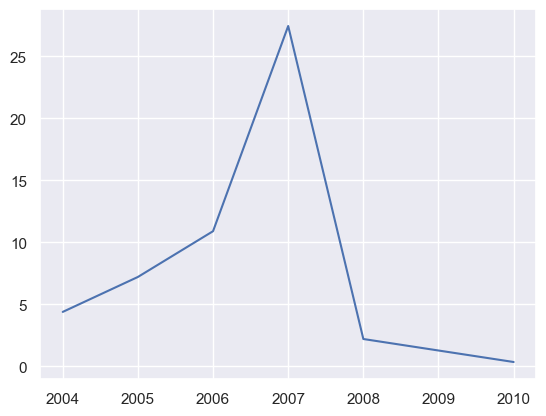

In [74]:
plt.plot(Revenue_as_per_Year["sale_date"], Revenue_as_per_Year["Total_Revenue_in_millions"])
plt.show()